In [1]:
import numpy as np

X = np.load('data/images.npy')
y = np.load('data/classifications.npy')

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
from demo_adaline_gd import AdalineGD

ada = AdalineGD(learning_rate=0.000003, epochs=1000).fit(X_train_std, y_train)
y_pred = ada.predict(X_test_std)

In [5]:
np.where(y_test == y_pred, 1, 0).sum() / len(y_test)

0.7333333333333333

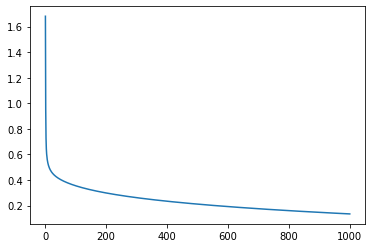

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(ada.cost) + 1), ada.cost)
plt.show()

In [7]:
from demo_logistic_regression_gd import LogisticRegressionGD

lr = LogisticRegressionGD(learning_rate=0.00001, epochs=1000).fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

In [8]:
np.where(y_test == y_pred, 1, 0).sum() / len(y_test)

0.7666666666666667

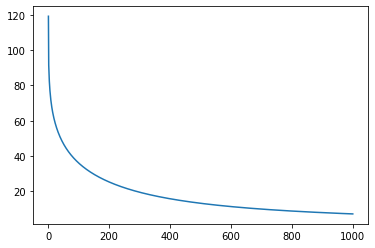

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(lr.cost) + 1), lr.cost)
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=1000000, random_state=1).fit(X_train_std, y_train.ravel())
lr.score(X_test_std, y_test.ravel())

0.8